In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pysal as ps # Wczytanie danych z pliku dbf

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W rozdziale tym skupimy się na następujących klasyfikacji SVM


Na końcu zaprezentowane zostaną metody łączenia wyników różnych klasyfikatorów (tzw. ensemblingu), w celu poprawy jakości klasyfikacji.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

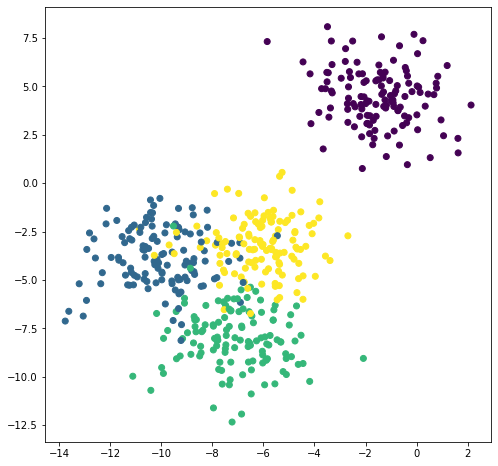

In [2]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

#pelna analiza danych 
# Wyciagniecie wniosku 
#

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### 2.4 SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, jest są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder nieliniowych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder nieliniowych, uważając na przeuczenie klasyfikatora.   

,feature1,feature2,label
0,-10.785289,1.728062,1
1,-6.342566,9.911338,0
2,-14.431693,-3.683509,1
3,10.389289,-6.023495,0
4,-4.118290,-5.106990,1
...,...,...,...
495,-13.098551,-3.460073,1
496,-3.288403,-10.189205,1
497,-10.095709,-7.254112,1
498,-6.396800,8.117403,0


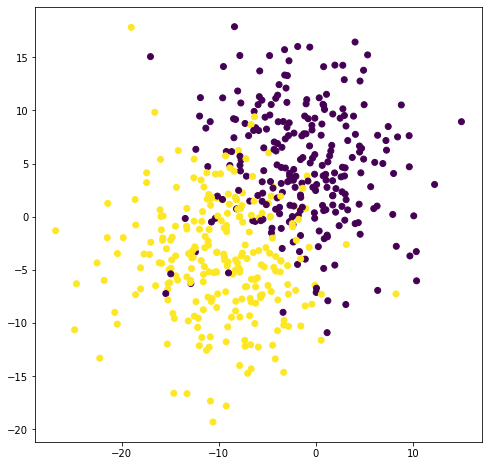

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=5.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

dane3

/home/andrzej/anaconda3/envs/numbers-classification/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


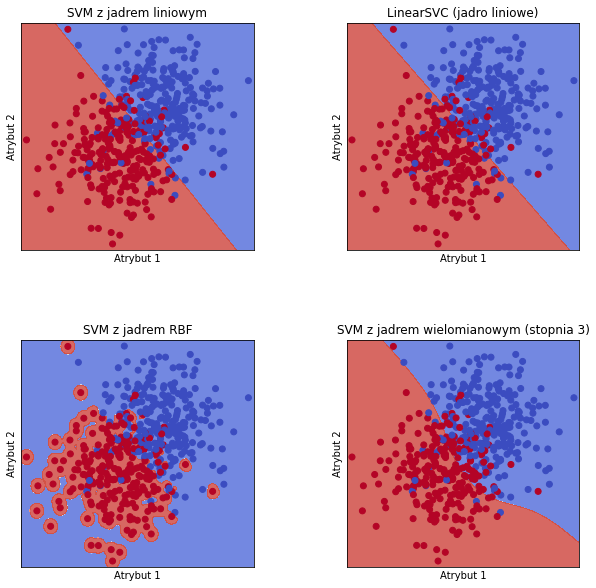

In [4]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=2).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Funkcja

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

def show_decision_limits_and_roc_curve_SVG(kernel):
    C = [0.01, 0.1, 1, 10, 100, 1000]

    plt.figure(figsize=(25,25))

    trainX, testX, trainy, testy = train_test_split(dane3[cechy], dane3['label'], test_size=0.3, random_state=2)
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(testy))]

    x_min, x_max = trainX.iloc[:, 0].min() - 1, trainX.iloc[:, 0].max() + 1
    y_min, y_max = trainX.iloc[:, 1].min() - 1, trainX.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
        
    for i, c in enumerate(C):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        
        plt.subplot(6, 2, 2*i + 1)
        plt.subplots_adjust(wspace=0.2, hspace=0.4)
        if kernel == 'LinearSVC': 
            model =  CalibratedClassifierCV(svm.LinearSVC(C=c),cv=5, n_jobs=-1 ) # add CalibratedClassifierCV  (cross validate method) for use model.predict_prob 
        else:
            model =  svm.SVC(kernel=kernel, C=c, probability=True)
        
        model.fit(trainX, trainy) 

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(trainX.iloc[:, 0], trainX.iloc[:, 1], c=trainy, cmap=plt.cm.coolwarm)
        plt.xlabel('Atrybut 1')
        plt.ylabel('Atrybut 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(f'SVM z jadrem {kernel}, C = {c}')
        # 
        plt.subplot(6, 2, 2*i + 2)
        lr_probs = model.predict_proba(testX)
        # keep probabilities for the positive outcome only
        lr_probs = lr_probs[:, 1]
        # calculate scores
        ns_auc = roc_auc_score(testy, ns_probs)
        lr_auc = roc_auc_score(testy, lr_probs)
        # summarize scores
        print('c =',c)
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print('Logistic: ROC AUC=%.3f' % (lr_auc))
        # calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
        lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
        # plot the roc curve for the model
        plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
        plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # show the legend
        plt.legend()
        # show the plot


    plt.show()

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

c = 0.01
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.943
c = 0.1
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944
c = 1
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944
c = 10
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944
c = 100
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944
c = 1000
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944


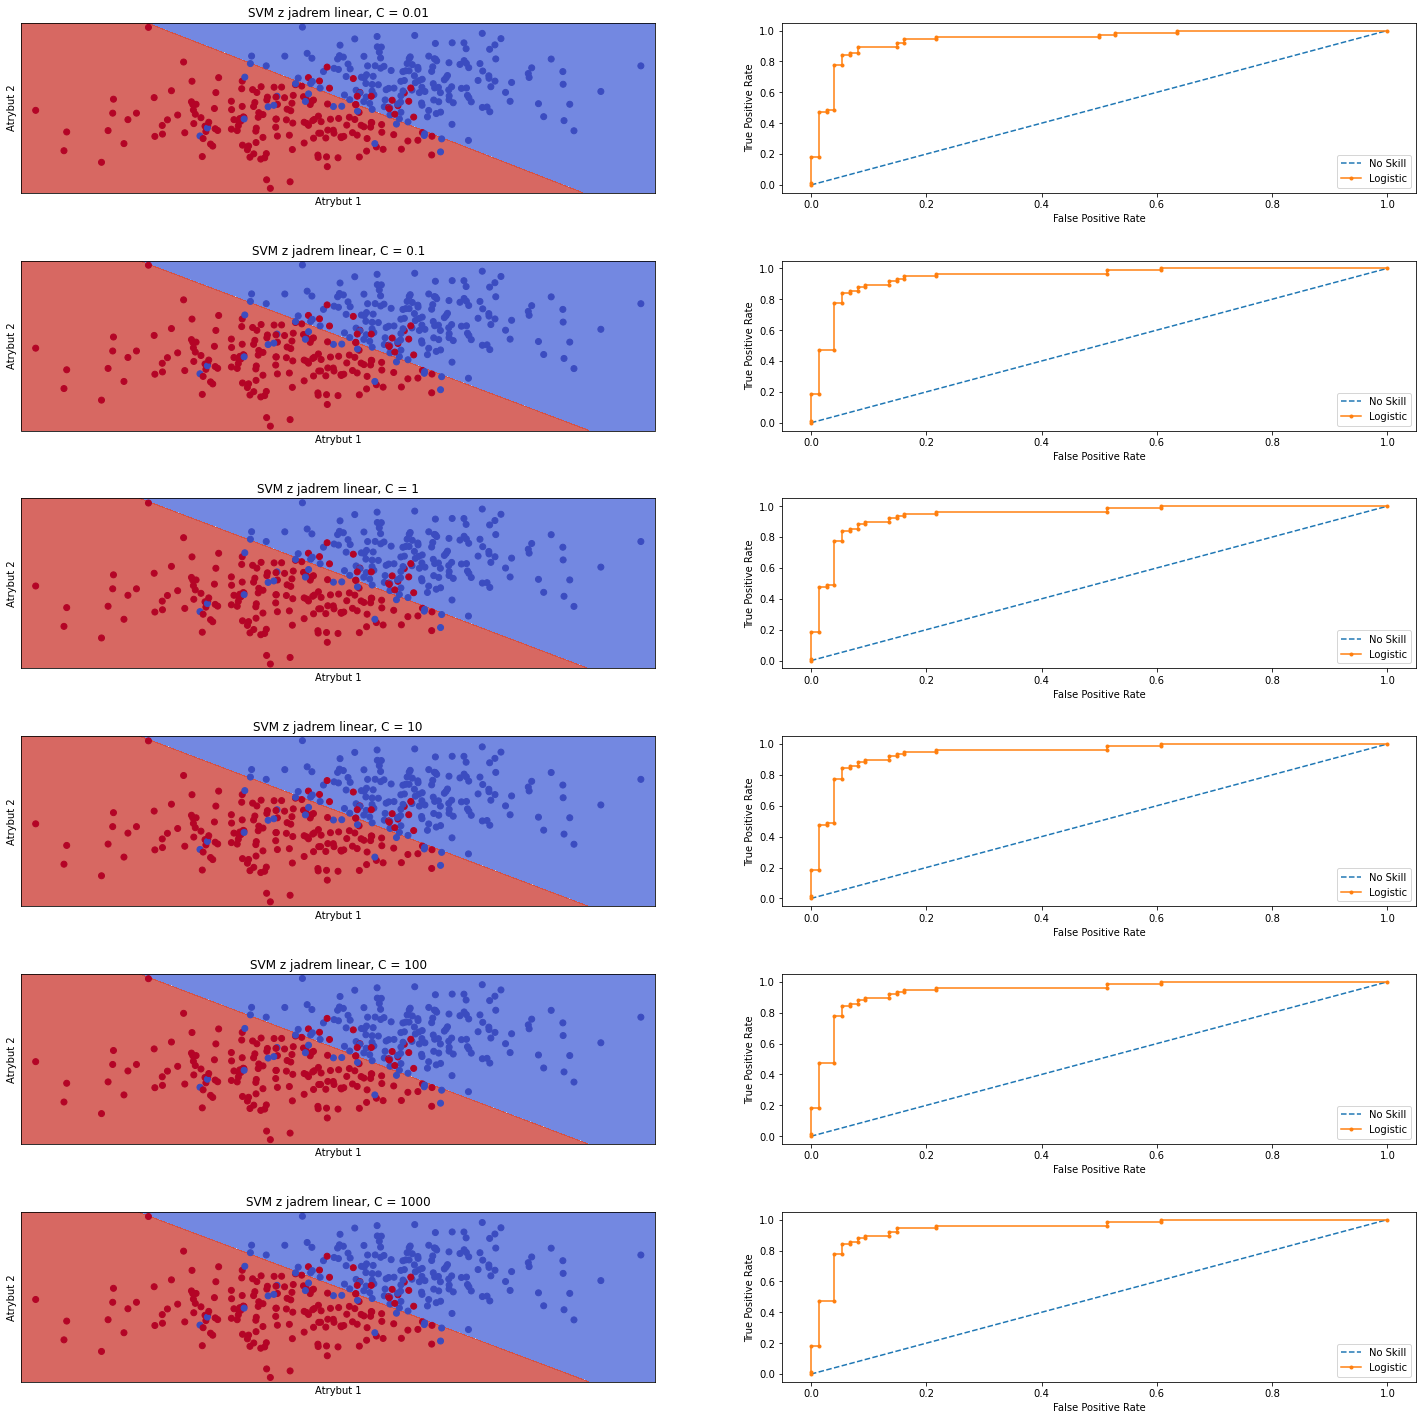

In [6]:
show_decision_limits_and_roc_curve_SVG('linear')


- Minimalnie gorszy result ma dla c = 0.01, a dla pozostałych przypadku, granica decyzyjna jest taka sama. 
- Granica decyzyjna jest taka sama, dlatego ,że jest to prosta funkcja liniowa. 


### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

c = 0.01
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.947
c = 0.1
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944
c = 1
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944
c = 10
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.951
c = 100
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.950
c = 1000
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.937


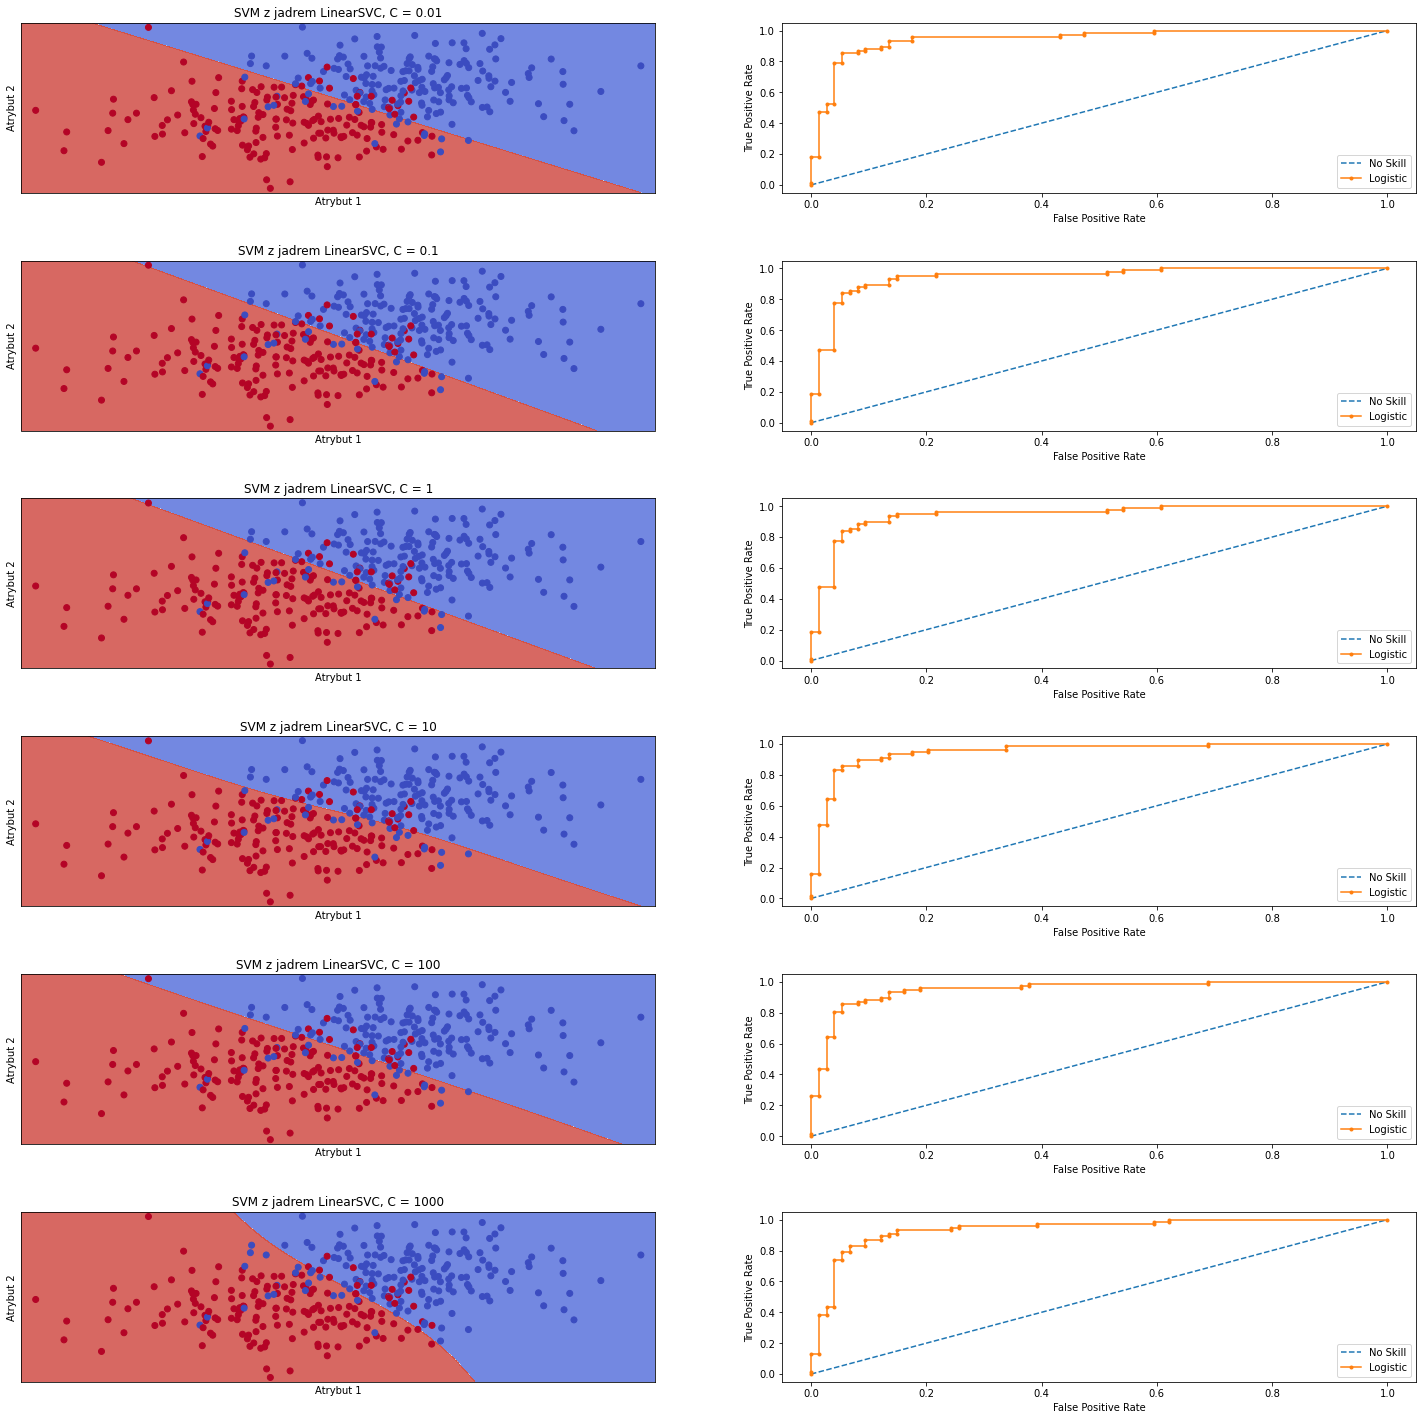

In [7]:
show_decision_limits_and_roc_curve_SVG('LinearSVC')


- LinearSVG, działa szybciej niż svm.SVG, oraz otrzymują rózne wyniki.
- LinearSVG podobne do SVC z parametrem kernel='linear', ale zaimplementowane w kategoriach liblinear, a nie libsvm. 
- Najlepszy wynik, otrzymuje dla c = 0.01, ponieważ wtedy zachodzi najwieksza generalizacja.
- Wykorzystałem walidacje krzyżową aby moc użyć funkcji model.predict_prob, równiez przez to wyniki mogą sie tak róznić od SVC z parametrem kernel='linear'.


### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

{'C': 10, 'degree': 3}
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.929


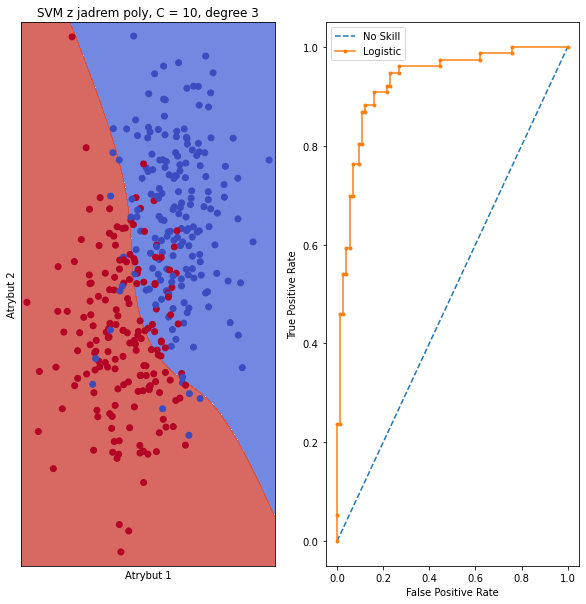

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

# C = [0.01, 0.1, 1, 10, 100, 1000]


plt.figure(figsize=(10,10))

trainX, testX, trainy, testy = train_test_split(dane3[cechy], dane3['label'], test_size=0.3, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

x_min, x_max = trainX.iloc[:, 0].min() - 1, trainX.iloc[:, 0].max() + 1
y_min, y_max = trainX.iloc[:, 1].min() - 1, trainX.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
    
    
plt.subplot(1, 2,1)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

model = GridSearchCV(estimator=svm.SVC(kernel= 'poly',probability=True), param_grid={'C': [0.1,1,10], 'degree': (3,5,7)},cv = 5,refit=True)
model.fit(trainX, trainy) 

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

print(model.best_params_)
c = model.best_params_['C'] 
degree = model.best_params_['degree']
# # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(trainX.iloc[:, 0], trainX.iloc[:, 1], c=trainy, cmap=plt.cm.coolwarm)
plt.xlabel('Atrybut 1')
plt.ylabel('Atrybut 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(f'SVM z jadrem poly, C = {c}, degree {degree}')
# 
plt.subplot(1, 2, 2)
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot


plt.show()

- Wykorzystałem GridSearchCV, aby znalezć najlepsze parametry  modelu ({'C': 10, 'degree': 3}), nastepnie zrobiłem wykreśl krzywe ROC. 
- Wyniki dla testowy jest mniejszy niż, dla svq liniowego a to dlatego, że nasz model sie przeuczył.

### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

c = 0.01
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.943
c = 0.1
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.943
c = 1
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.941
c = 10
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.932
c = 100
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.931
c = 1000
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.933


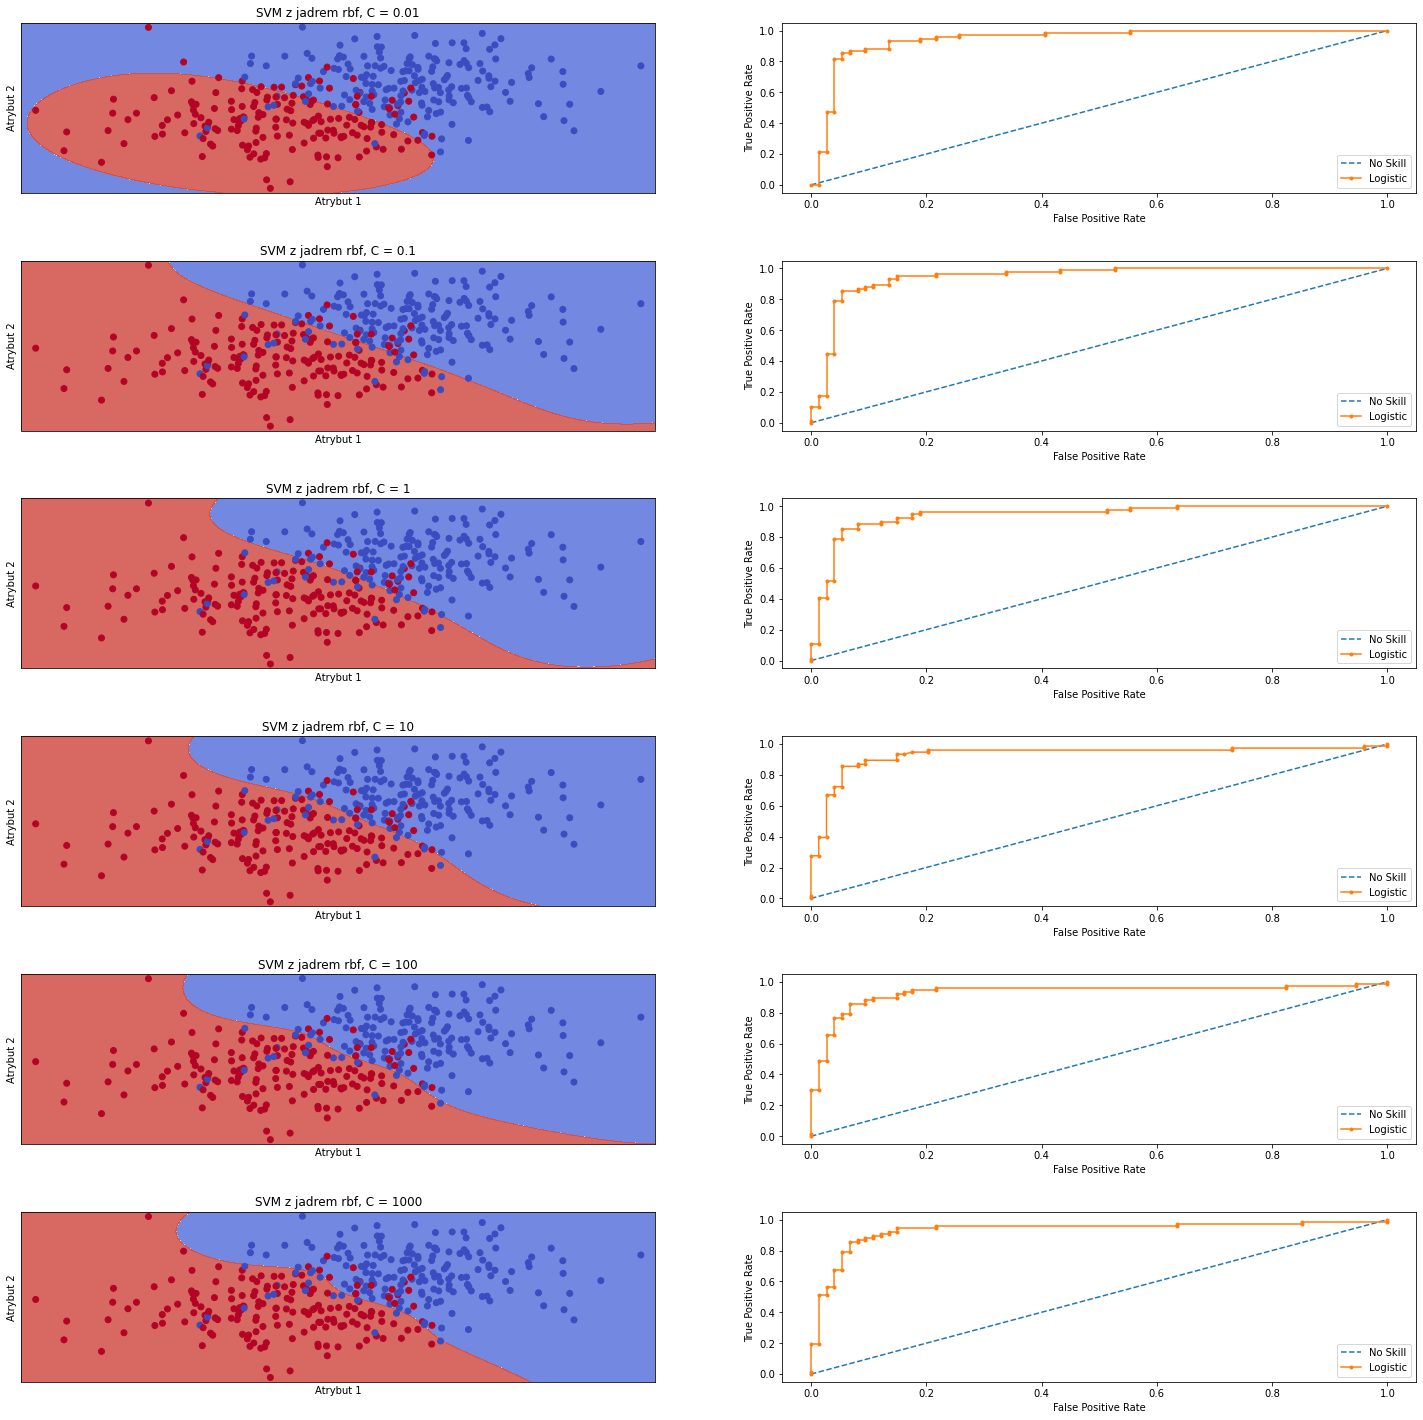

In [9]:
show_decision_limits_and_roc_curve_SVG('rbf')

- Najlepszy wynik otrzymuje, dla c = 0.1 lub 0.001, gdzie granice decyzyjna ma kszatł liniowy.


Wnioski ogolne

- Jesli C jest małe to, spowoduję w płaszczyzna odzielająca bedzie o wiekszym marginesie, nawet jesli zaklasifukuje wiecej błednych punktów. (Im mniejsza c tym zwieksza sie genalizowanie modelu)
- Dziele zbiór na trainigowym i testowy, na zbiorze testowym wykreślam krzywe ROC
- Obszar pod krzywą ROC można wykorzystać jako podsumowanie umiejętności modelowania.
- Prodict_proba daje prawdopodobieństwo 1. ( musi być klasifikacja binarna) 